# Imports and configs

In [1]:
!pip install -q autogluon.tabular ray==2.10.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
aiobotocore 2.15.0 requires botocore<1.35.17,>=1.35.16, but you have botocore 1.29.165 which is incompatible.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libp

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import pickle
import shutil
import os

warnings.filterwarnings('ignore')

In [3]:
class CFG:
    train_path = '/kaggle/input/playground-series-s4e10/train.csv'
    test_path = '/kaggle/input/playground-series-s4e10/test.csv'
    sample_sub_path = '/kaggle/input/playground-series-s4e10/sample_submission.csv'
    
    target = 'loan_status'
    n_folds = 5
    seed = 1859
    time_limit = 3600 * 11

# Loading data and predefining folds

In [4]:
train = pd.read_csv(CFG.train_path, index_col='id')
test = pd.read_csv(CFG.test_path, index_col='id')

In [5]:
skf = StratifiedKFold(n_splits=CFG.n_folds, random_state=CFG.seed, shuffle=True)
split = skf.split(train, train[CFG.target])
for i, (_, val_index) in enumerate(split):
    train.loc[val_index, 'fold'] = i

# Fitting the predictor

In [6]:
predictor = TabularPredictor(
    log_file_path='logs.txt',
    log_to_file=True,
    problem_type='binary',
    eval_metric='roc_auc',
    label=CFG.target,
    groups='fold',
    verbosity=2
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241006_133836"


In [7]:
predictor.fit(
    train_data=train,
    time_limit=CFG.time_limit,
    presets='best_quality',
    excluded_model_types=['KNN', 'NN', 'XT', 'FASTAI', 'NN_TORCH'],
    ag_args_fit={
        'num_gpus': 1, 
        'num_cpus': 4
    }
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Jun 27 20:43:36 UTC 2024
CPU Count:          4
Memory Avail:       30.19 GB / 31.36 GB (96.3%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	

(_ray_fit pid=362) [1000]	valid_set's binary_logloss: 0.169026


(_ray_fit pid=410) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=410) [1000]	valid_set's binary_logloss: 0.160595
(_ray_fit pid=410) [2000]	valid_set's binary_logloss: 0.160742


(_ray_fit pid=458) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=458) [1000]	valid_set's binary_logloss: 0.168161


(_ray_fit pid=506) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=506) [1000]	valid_set's binary_logloss: 0.164865


(_ray_fit pid=554) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=554) [1000]	valid_set's binary_logloss: 0.166816


(_dystack pid=169) 	0.94	 = Validation score   (roc_auc)
(_dystack pid=169) 	62.37s	 = Training   runtime
(_dystack pid=169) 	2.21s	 = Validation runtime
(_dystack pid=169) Fitting model: LightGBM_BAG_L1 ... Training model for up to 6526.27s of the 9826.24s of remaining time.
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.08%)
(_ray_fit pid=614) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=662) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=710) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=758) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=806) 	Training S1F5 with GPU, note that this may negatively impact model 

(_ray_fit pid=2563) [1000]	valid_set's binary_logloss: 0.149811


(_ray_fit pid=2611) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2611) [1000]	valid_set's binary_logloss: 0.144808


(_ray_fit pid=2659) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2659) [1000]	valid_set's binary_logloss: 0.149728


(_ray_fit pid=2707) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2707) [1000]	valid_set's binary_logloss: 0.147776


(_ray_fit pid=2755) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=2755) [1000]	valid_set's binary_logloss: 0.150355


(_dystack pid=169) 	0.9574	 = Validation score   (roc_auc)
(_dystack pid=169) 	74.84s	 = Training   runtime
(_dystack pid=169) 	2.26s	 = Validation runtime
(_dystack pid=169) Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 5621.42s of the 8921.39s of remaining time.
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.13%)
(_ray_fit pid=2815) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2815) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=2888) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=2888) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=2961) 	Training S1F3 with GPU, note that this may nega

(_ray_fit pid=3192) [1000]	valid_set's binary_logloss: 0.18023
(_ray_fit pid=3192) [2000]	valid_set's binary_logloss: 0.173386
(_ray_fit pid=3192) [3000]	valid_set's binary_logloss: 0.170535
(_ray_fit pid=3192) [4000]	valid_set's binary_logloss: 0.168755
(_ray_fit pid=3192) [5000]	valid_set's binary_logloss: 0.167549
(_ray_fit pid=3192) [6000]	valid_set's binary_logloss: 0.166746
(_ray_fit pid=3192) [7000]	valid_set's binary_logloss: 0.16629
(_ray_fit pid=3192) [8000]	valid_set's binary_logloss: 0.165819
(_ray_fit pid=3192) [9000]	valid_set's binary_logloss: 0.16552
(_ray_fit pid=3192) [10000]	valid_set's binary_logloss: 0.165298


(_ray_fit pid=3240) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=3240) [1000]	valid_set's binary_logloss: 0.173525
(_ray_fit pid=3240) [2000]	valid_set's binary_logloss: 0.166858
(_ray_fit pid=3240) [3000]	valid_set's binary_logloss: 0.163646
(_ray_fit pid=3240) [4000]	valid_set's binary_logloss: 0.162223
(_ray_fit pid=3240) [5000]	valid_set's binary_logloss: 0.160998
(_ray_fit pid=3240) [6000]	valid_set's binary_logloss: 0.160033
(_ray_fit pid=3240) [7000]	valid_set's binary_logloss: 0.15929
(_ray_fit pid=3240) [8000]	valid_set's binary_logloss: 0.158806
(_ray_fit pid=3240) [9000]	valid_set's binary_logloss: 0.158412
(_ray_fit pid=3240) [10000]	valid_set's binary_logloss: 0.158158


(_ray_fit pid=3288) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=3288) [1000]	valid_set's binary_logloss: 0.176866
(_ray_fit pid=3288) [2000]	valid_set's binary_logloss: 0.170368
(_ray_fit pid=3288) [3000]	valid_set's binary_logloss: 0.167948
(_ray_fit pid=3288) [4000]	valid_set's binary_logloss: 0.166412
(_ray_fit pid=3288) [5000]	valid_set's binary_logloss: 0.16539
(_ray_fit pid=3288) [6000]	valid_set's binary_logloss: 0.16493
(_ray_fit pid=3288) [7000]	valid_set's binary_logloss: 0.164624
(_ray_fit pid=3288) [8000]	valid_set's binary_logloss: 0.164244
(_ray_fit pid=3288) [9000]	valid_set's binary_logloss: 0.164054
(_ray_fit pid=3288) [10000]	valid_set's binary_logloss: 0.164001


(_ray_fit pid=3336) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=3336) [1000]	valid_set's binary_logloss: 0.177186
(_ray_fit pid=3336) [2000]	valid_set's binary_logloss: 0.170021
(_ray_fit pid=3336) [3000]	valid_set's binary_logloss: 0.16706
(_ray_fit pid=3336) [4000]	valid_set's binary_logloss: 0.165584
(_ray_fit pid=3336) [5000]	valid_set's binary_logloss: 0.164453
(_ray_fit pid=3336) [6000]	valid_set's binary_logloss: 0.163915
(_ray_fit pid=3336) [7000]	valid_set's binary_logloss: 0.163305
(_ray_fit pid=3336) [8000]	valid_set's binary_logloss: 0.16295
(_ray_fit pid=3336) [9000]	valid_set's binary_logloss: 0.162873
(_ray_fit pid=3336) [10000]	valid_set's binary_logloss: 0.162677


(_ray_fit pid=3384) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=3384) [1000]	valid_set's binary_logloss: 0.180961
(_ray_fit pid=3384) [2000]	valid_set's binary_logloss: 0.172797
(_ray_fit pid=3384) [3000]	valid_set's binary_logloss: 0.169471
(_ray_fit pid=3384) [4000]	valid_set's binary_logloss: 0.167549
(_ray_fit pid=3384) [5000]	valid_set's binary_logloss: 0.166426
(_ray_fit pid=3384) [6000]	valid_set's binary_logloss: 0.165684
(_ray_fit pid=3384) [7000]	valid_set's binary_logloss: 0.165148
(_ray_fit pid=3384) [8000]	valid_set's binary_logloss: 0.164777
(_ray_fit pid=3384) [9000]	valid_set's binary_logloss: 0.164652
(_ray_fit pid=3384) [10000]	valid_set's binary_logloss: 0.164461


(_dystack pid=169) 	0.9427	 = Validation score   (roc_auc)
(_dystack pid=169) 	213.66s	 = Training   runtime
(_dystack pid=169) 	17.13s	 = Validation runtime
(_dystack pid=169) Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 5293.69s of the 8593.66s of remaining time.
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.21%)
(_ray_fit pid=3444) /opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:00:27] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
(_ray_fit pid=3444)   warnings.warn(smsg, UserWarning)
(_ray_fit pid=3444) /opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:00:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

(_ray_fit pid=6988) [1000]	valid_set's binary_logloss: 0.192829
(_ray_fit pid=6988) [2000]	valid_set's binary_logloss: 0.180298
(_ray_fit pid=6988) [3000]	valid_set's binary_logloss: 0.176069
(_ray_fit pid=6988) [4000]	valid_set's binary_logloss: 0.174054
(_ray_fit pid=6988) [5000]	valid_set's binary_logloss: 0.173194
(_ray_fit pid=6988) [6000]	valid_set's binary_logloss: 0.172729
(_ray_fit pid=6988) [7000]	valid_set's binary_logloss: 0.172553
(_ray_fit pid=6988) [8000]	valid_set's binary_logloss: 0.172456
(_ray_fit pid=6988) [9000]	valid_set's binary_logloss: 0.172613


(_ray_fit pid=7036) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=7036) [1000]	valid_set's binary_logloss: 0.184687
(_ray_fit pid=7036) [2000]	valid_set's binary_logloss: 0.172523
(_ray_fit pid=7036) [3000]	valid_set's binary_logloss: 0.168519
(_ray_fit pid=7036) [4000]	valid_set's binary_logloss: 0.166412
(_ray_fit pid=7036) [5000]	valid_set's binary_logloss: 0.165302
(_ray_fit pid=7036) [6000]	valid_set's binary_logloss: 0.16467
(_ray_fit pid=7036) [7000]	valid_set's binary_logloss: 0.164321
(_ray_fit pid=7036) [8000]	valid_set's binary_logloss: 0.164071
(_ray_fit pid=7036) [9000]	valid_set's binary_logloss: 0.163982
(_ray_fit pid=7036) [10000]	valid_set's binary_logloss: 0.16394


(_ray_fit pid=7084) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=7084) [1000]	valid_set's binary_logloss: 0.188923
(_ray_fit pid=7084) [2000]	valid_set's binary_logloss: 0.176874
(_ray_fit pid=7084) [3000]	valid_set's binary_logloss: 0.173124
(_ray_fit pid=7084) [4000]	valid_set's binary_logloss: 0.171567
(_ray_fit pid=7084) [5000]	valid_set's binary_logloss: 0.17082
(_ray_fit pid=7084) [6000]	valid_set's binary_logloss: 0.170439
(_ray_fit pid=7084) [7000]	valid_set's binary_logloss: 0.170373
(_ray_fit pid=7084) [8000]	valid_set's binary_logloss: 0.170455
(_ray_fit pid=7084) [9000]	valid_set's binary_logloss: 0.170525


(_ray_fit pid=7132) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=7132) [1000]	valid_set's binary_logloss: 0.189595
(_ray_fit pid=7132) [2000]	valid_set's binary_logloss: 0.175823
(_ray_fit pid=7132) [3000]	valid_set's binary_logloss: 0.171841
(_ray_fit pid=7132) [4000]	valid_set's binary_logloss: 0.169675
(_ray_fit pid=7132) [5000]	valid_set's binary_logloss: 0.168751
(_ray_fit pid=7132) [6000]	valid_set's binary_logloss: 0.168285
(_ray_fit pid=7132) [7000]	valid_set's binary_logloss: 0.168023
(_ray_fit pid=7132) [8000]	valid_set's binary_logloss: 0.168043
(_ray_fit pid=7132) [9000]	valid_set's binary_logloss: 0.168171


(_ray_fit pid=7180) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=7180) [1000]	valid_set's binary_logloss: 0.19323
(_ray_fit pid=7180) [2000]	valid_set's binary_logloss: 0.180205
(_ray_fit pid=7180) [3000]	valid_set's binary_logloss: 0.175267
(_ray_fit pid=7180) [4000]	valid_set's binary_logloss: 0.173046
(_ray_fit pid=7180) [5000]	valid_set's binary_logloss: 0.17193
(_ray_fit pid=7180) [6000]	valid_set's binary_logloss: 0.171295
(_ray_fit pid=7180) [7000]	valid_set's binary_logloss: 0.171019
(_ray_fit pid=7180) [8000]	valid_set's binary_logloss: 0.170859
(_ray_fit pid=7180) [9000]	valid_set's binary_logloss: 0.170877
(_ray_fit pid=7180) [10000]	valid_set's binary_logloss: 0.171015


(_dystack pid=169) 	0.9367	 = Validation score   (roc_auc)
(_dystack pid=169) 	606.36s	 = Training   runtime
(_dystack pid=169) 	31.83s	 = Validation runtime
(_dystack pid=169) Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 2295.74s of the 5595.71s of remaining time.
(_dystack pid=169) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.12%)
(_dystack pid=169) 	0.9408	 = Validation score   (roc_auc)
(_dystack pid=169) 	79.22s	 = Training   runtime
(_dystack pid=169) 	0.91s	 = Validation runtime
(_dystack pid=169) Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 2214.11s of the 5514.08s of remaining time.
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.10%)
(_ray_fit pid=7517) 	Training S1F1 with GPU

(_ray_fit pid=8126) [1000]	valid_set's binary_logloss: 0.150255
(_ray_fit pid=8126) [2000]	valid_set's binary_logloss: 0.149132


(_ray_fit pid=8174) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=8174) [1000]	valid_set's binary_logloss: 0.145336


(_ray_fit pid=8222) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=8222) [1000]	valid_set's binary_logloss: 0.14927


(_ray_fit pid=8270) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=8270) [1000]	valid_set's binary_logloss: 0.147505


(_ray_fit pid=8318) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=8318) [1000]	valid_set's binary_logloss: 0.151456


(_dystack pid=169) 	0.9573	 = Validation score   (roc_auc)
(_dystack pid=169) 	59.59s	 = Training   runtime
(_dystack pid=169) 	2.22s	 = Validation runtime
(_dystack pid=169) Fitting model: CatBoost_r86_BAG_L1 ... Training model for up to 1631.65s of the 4931.62s of remaining time.
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.13%)
(_ray_fit pid=8378) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=8378) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=8451) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=8451) 	Warning: CatBoost on GPU is experimental. If you encounter issues, use CPU for training CatBoost instead.
(_ray_fit pid=8524) 	Training S1F3 with GPU, note that this may neg

(_ray_fit pid=9874) [1000]	valid_set's binary_logloss: 0.173336
(_ray_fit pid=9874) [2000]	valid_set's binary_logloss: 0.168252
(_ray_fit pid=9874) [3000]	valid_set's binary_logloss: 0.166872
(_ray_fit pid=9874) [4000]	valid_set's binary_logloss: 0.166358
(_ray_fit pid=9874) [5000]	valid_set's binary_logloss: 0.166014


(_ray_fit pid=9874) 	Ran out of time, early stopping on iteration 5691. Best iteration is:
(_ray_fit pid=9874) 	[5193]	valid_set's binary_logloss: 0.165811
(_ray_fit pid=9922) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=9922) [1000]	valid_set's binary_logloss: 0.166545
(_ray_fit pid=9922) [2000]	valid_set's binary_logloss: 0.162052
(_ray_fit pid=9922) [3000]	valid_set's binary_logloss: 0.160241
(_ray_fit pid=9922) [4000]	valid_set's binary_logloss: 0.1589
(_ray_fit pid=9922) [5000]	valid_set's binary_logloss: 0.158316
(_ray_fit pid=9922) [6000]	valid_set's binary_logloss: 0.15811


(_ray_fit pid=9922) 	Ran out of time, early stopping on iteration 6240. Best iteration is:
(_ray_fit pid=9922) 	[6197]	valid_set's binary_logloss: 0.157929
(_ray_fit pid=9970) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=9970) [1000]	valid_set's binary_logloss: 0.170096
(_ray_fit pid=9970) [2000]	valid_set's binary_logloss: 0.166165
(_ray_fit pid=9970) [3000]	valid_set's binary_logloss: 0.165096
(_ray_fit pid=9970) [4000]	valid_set's binary_logloss: 0.164723
(_ray_fit pid=9970) [5000]	valid_set's binary_logloss: 0.164534


(_ray_fit pid=10018) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=10018) [1000]	valid_set's binary_logloss: 0.170041
(_ray_fit pid=10018) [2000]	valid_set's binary_logloss: 0.165545
(_ray_fit pid=10018) [3000]	valid_set's binary_logloss: 0.163533
(_ray_fit pid=10018) [4000]	valid_set's binary_logloss: 0.162935
(_ray_fit pid=10018) [5000]	valid_set's binary_logloss: 0.162767


(_ray_fit pid=10018) 	Ran out of time, early stopping on iteration 5551. Best iteration is:
(_ray_fit pid=10018) 	[4797]	valid_set's binary_logloss: 0.162584
(_ray_fit pid=10066) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=10066) [1000]	valid_set's binary_logloss: 0.173627
(_ray_fit pid=10066) [2000]	valid_set's binary_logloss: 0.168639
(_ray_fit pid=10066) [3000]	valid_set's binary_logloss: 0.166387
(_ray_fit pid=10066) [4000]	valid_set's binary_logloss: 0.165411
(_ray_fit pid=10066) [5000]	valid_set's binary_logloss: 0.165293


(_ray_fit pid=10066) 	Ran out of time, early stopping on iteration 5776. Best iteration is:
(_ray_fit pid=10066) 	[5388]	valid_set's binary_logloss: 0.165219
(_dystack pid=169) 	0.9429	 = Validation score   (roc_auc)
(_dystack pid=169) 	131.48s	 = Training   runtime
(_dystack pid=169) 	8.97s	 = Validation runtime
(_dystack pid=169) Fitting model: WeightedEnsemble_L2 ... Training model for up to 659.5s of the 3295.54s of remaining time.
(_dystack pid=169) 	Ensemble Weights: {'LightGBM_r130_BAG_L1': 0.381, 'XGBoost_r89_BAG_L1': 0.238, 'LightGBM_r15_BAG_L1': 0.238, 'CatBoost_r50_BAG_L1': 0.095, 'CatBoost_r9_BAG_L1': 0.048}
(_dystack pid=169) 	0.9591	 = Validation score   (roc_auc)
(_dystack pid=169) 	3.72s	 = Training   runtime
(_dystack pid=169) 	0.01s	 = Validation runtime
(_dystack pid=169) Excluded models: ['XT', 'FASTAI', 'KNN', 'NN_TORCH'] (Specified by `excluded_model_types`)
(_dystack pid=169) Fitting 55 L2 models ...
(_dystack pid=169) Fitting model: LightGBMXT_BAG_L2 ... Trainin

(_ray_fit pid=16841) [1000]	valid_set's binary_logloss: 0.146254


(_ray_fit pid=16889) 	Training S1F2 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=16889) [1000]	valid_set's binary_logloss: 0.142176


(_ray_fit pid=16937) 	Training S1F3 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=16937) [1000]	valid_set's binary_logloss: 0.147901


(_ray_fit pid=16985) 	Training S1F4 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=16985) [1000]	valid_set's binary_logloss: 0.146209


(_ray_fit pid=17033) 	Training S1F5 with GPU, note that this may negatively impact model quality compared to CPU training.


(_ray_fit pid=17033) [1000]	valid_set's binary_logloss: 0.147942


(_dystack pid=169) 	0.9589	 = Validation score   (roc_auc)
(_dystack pid=169) 	152.1s	 = Training   runtime
(_dystack pid=169) 	3.53s	 = Validation runtime
(_dystack pid=169) Fitting model: RandomForest_r39_BAG_L2 ... Training model for up to 470.06s of the 469.95s of remaining time.
(_dystack pid=169) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=169) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (1 workers, per: cpus=4, gpus=1, memory=0.15%)
(_dystack pid=169) 	0.9551	 = Validation score   (roc_auc)
(_dystack pid=169) 	975.34s	 = Training   runtime
(_dystack pid=169) 	0.94s	 = Validation runtime
(_dystack pid=169) Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the -508.32s of remaining time.
(_dystack pid=169) 	Ensemble Weights: {'XGBoost_r89_BAG_L1': 0.167, 'LightGBMXT_BAG_L2': 0.167, 'CatBoost_r70_BAG_L2': 0.167, 'CatBoost_r137_BAG_L2': 0.125, 'RandomForestEntr_BAG_L2': 0.083, 'XGBoost_B

In [8]:
predictor.leaderboard(silent=True).style.background_gradient(subset=['score_val'], cmap='RdYlGn')

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.959590,roc_auc,11.656541,533.496202,0.008936,4.098157,2,True,56
1,LightGBM_r131_BAG_L1,0.958107,roc_auc,3.004950,86.446142,3.004950,86.446142,1,True,9
2,LightGBM_r130_BAG_L1,0.957944,roc_auc,0.598770,39.609374,0.598770,39.609374,1,True,18
3,LightGBM_r15_BAG_L1,0.957913,roc_auc,2.998286,71.806073,2.998286,71.806073,1,True,28
4,LightGBM_r121_BAG_L1,0.957396,roc_auc,3.394385,152.031509,3.394385,152.031509,1,True,47
5,XGBoost_r31_BAG_L1,0.957369,roc_auc,0.693826,78.482761,0.693826,78.482761,1,True,41
6,LightGBM_r161_BAG_L1,0.957136,roc_auc,3.380204,155.430604,3.380204,155.430604,1,True,22
7,XGBoost_r89_BAG_L1,0.956923,roc_auc,0.452402,18.517051,0.452402,18.517051,1,True,17
8,LightGBM_BAG_L1,0.956913,roc_auc,0.482830,31.575731,0.482830,31.575731,1,True,2
9,XGBoost_r22_BAG_L1,0.956695,roc_auc,0.450218,17.569127,0.450218,17.569127,1,True,45


# Visualizing the ensemble weights

In [9]:
def get_ensemble_weights():
    ensemble_weights = {}
    with open('logs.txt', 'rb') as f:
        prev_line = b''
        for line in f.readlines():
            if b'Ensemble Weights:' in line:
                name = prev_line.split(b'Fitting model: ')[1]
                name = name.split(b'...')[0]
                name = name.decode('utf-8')
                temp_ensemble_weights = line.split(b'Ensemble Weights: ')[1]
                temp_ensemble_weights = temp_ensemble_weights.split(b'\n')[0]
                temp_ensemble_weights = eval(temp_ensemble_weights)
                ensemble_weights[name] = temp_ensemble_weights
            prev_line = line
    return ensemble_weights

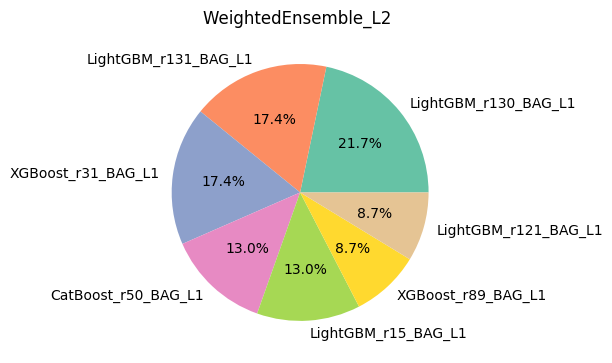

In [10]:
ensemble_weights = get_ensemble_weights()

for key, value in ensemble_weights.items():
    plt.figure(figsize=(6, 6))
    plt.pie(value.values(), labels=value.keys(), autopct='%1.1f%%', colors=sns.color_palette('Set2', len(value)))
    plt.title(key)
    plt.tight_layout()
    plt.show()

# Collecting and saving OOF files

In [11]:
def save_pred_probs(pred_probs, cv_score, name, type, is_ensemble):
    base_path = 'oof_pred_probs' if type == 'oof' else 'test_pred_probs'
    base_path = '.' if is_ensemble else base_path
    with open(f'{base_path}/{name}_{type}_pred_probs_{cv_score:.6f}.pkl', 'wb') as f:
        pickle.dump(pred_probs, f)

def save_submission(test_pred_probs, score):
    sub = pd.read_csv(CFG.sample_sub_path)
    sub[CFG.target] = test_pred_probs
    sub.to_csv(f'sub_autogluon_{score:.6f}.csv', index=False)
    
os.makedirs('oof_pred_probs', exist_ok=True)
os.makedirs('test_pred_probs', exist_ok=True)

In [12]:
oof_pred_probs = {}
test_pred_probs = {}

In [13]:
best_model = predictor.model_best
test_pred_probs = predictor.predict_proba_multi(test)
for model in predictor.model_names():
    model_oof_pred_probs = predictor.predict_proba_oof(model).values[:, 1]
    model_test_pred_probs = test_pred_probs[model].values[:, 1]
    
    cv_score = roc_auc_score(train[CFG.target], model_oof_pred_probs)
    if model != best_model:
        save_pred_probs(model_oof_pred_probs, cv_score, model, 'oof', False)
        save_pred_probs(model_test_pred_probs, cv_score, model, 'test', False)
    else:
        save_pred_probs(model_oof_pred_probs, cv_score, model, 'oof', True)
        save_pred_probs(model_test_pred_probs, cv_score, model, 'test', True)
        save_submission(model_test_pred_probs, cv_score)
        
    oof_pred_probs[model] = model_oof_pred_probs
    test_pred_probs[model] = model_test_pred_probs

# Visualizing the results

In [14]:
scores = {}
split = StratifiedKFold(n_splits=CFG.n_folds, random_state=CFG.seed, shuffle=True).split(train, train[CFG.target])
for fold_idx, (train_index, val_index) in enumerate(split):
    for model in predictor.model_names():
        fold_score = roc_auc_score(train.loc[val_index, CFG.target], oof_pred_probs[model][val_index])
        if model not in scores:
            scores[model] = []
        scores[model].append(fold_score)

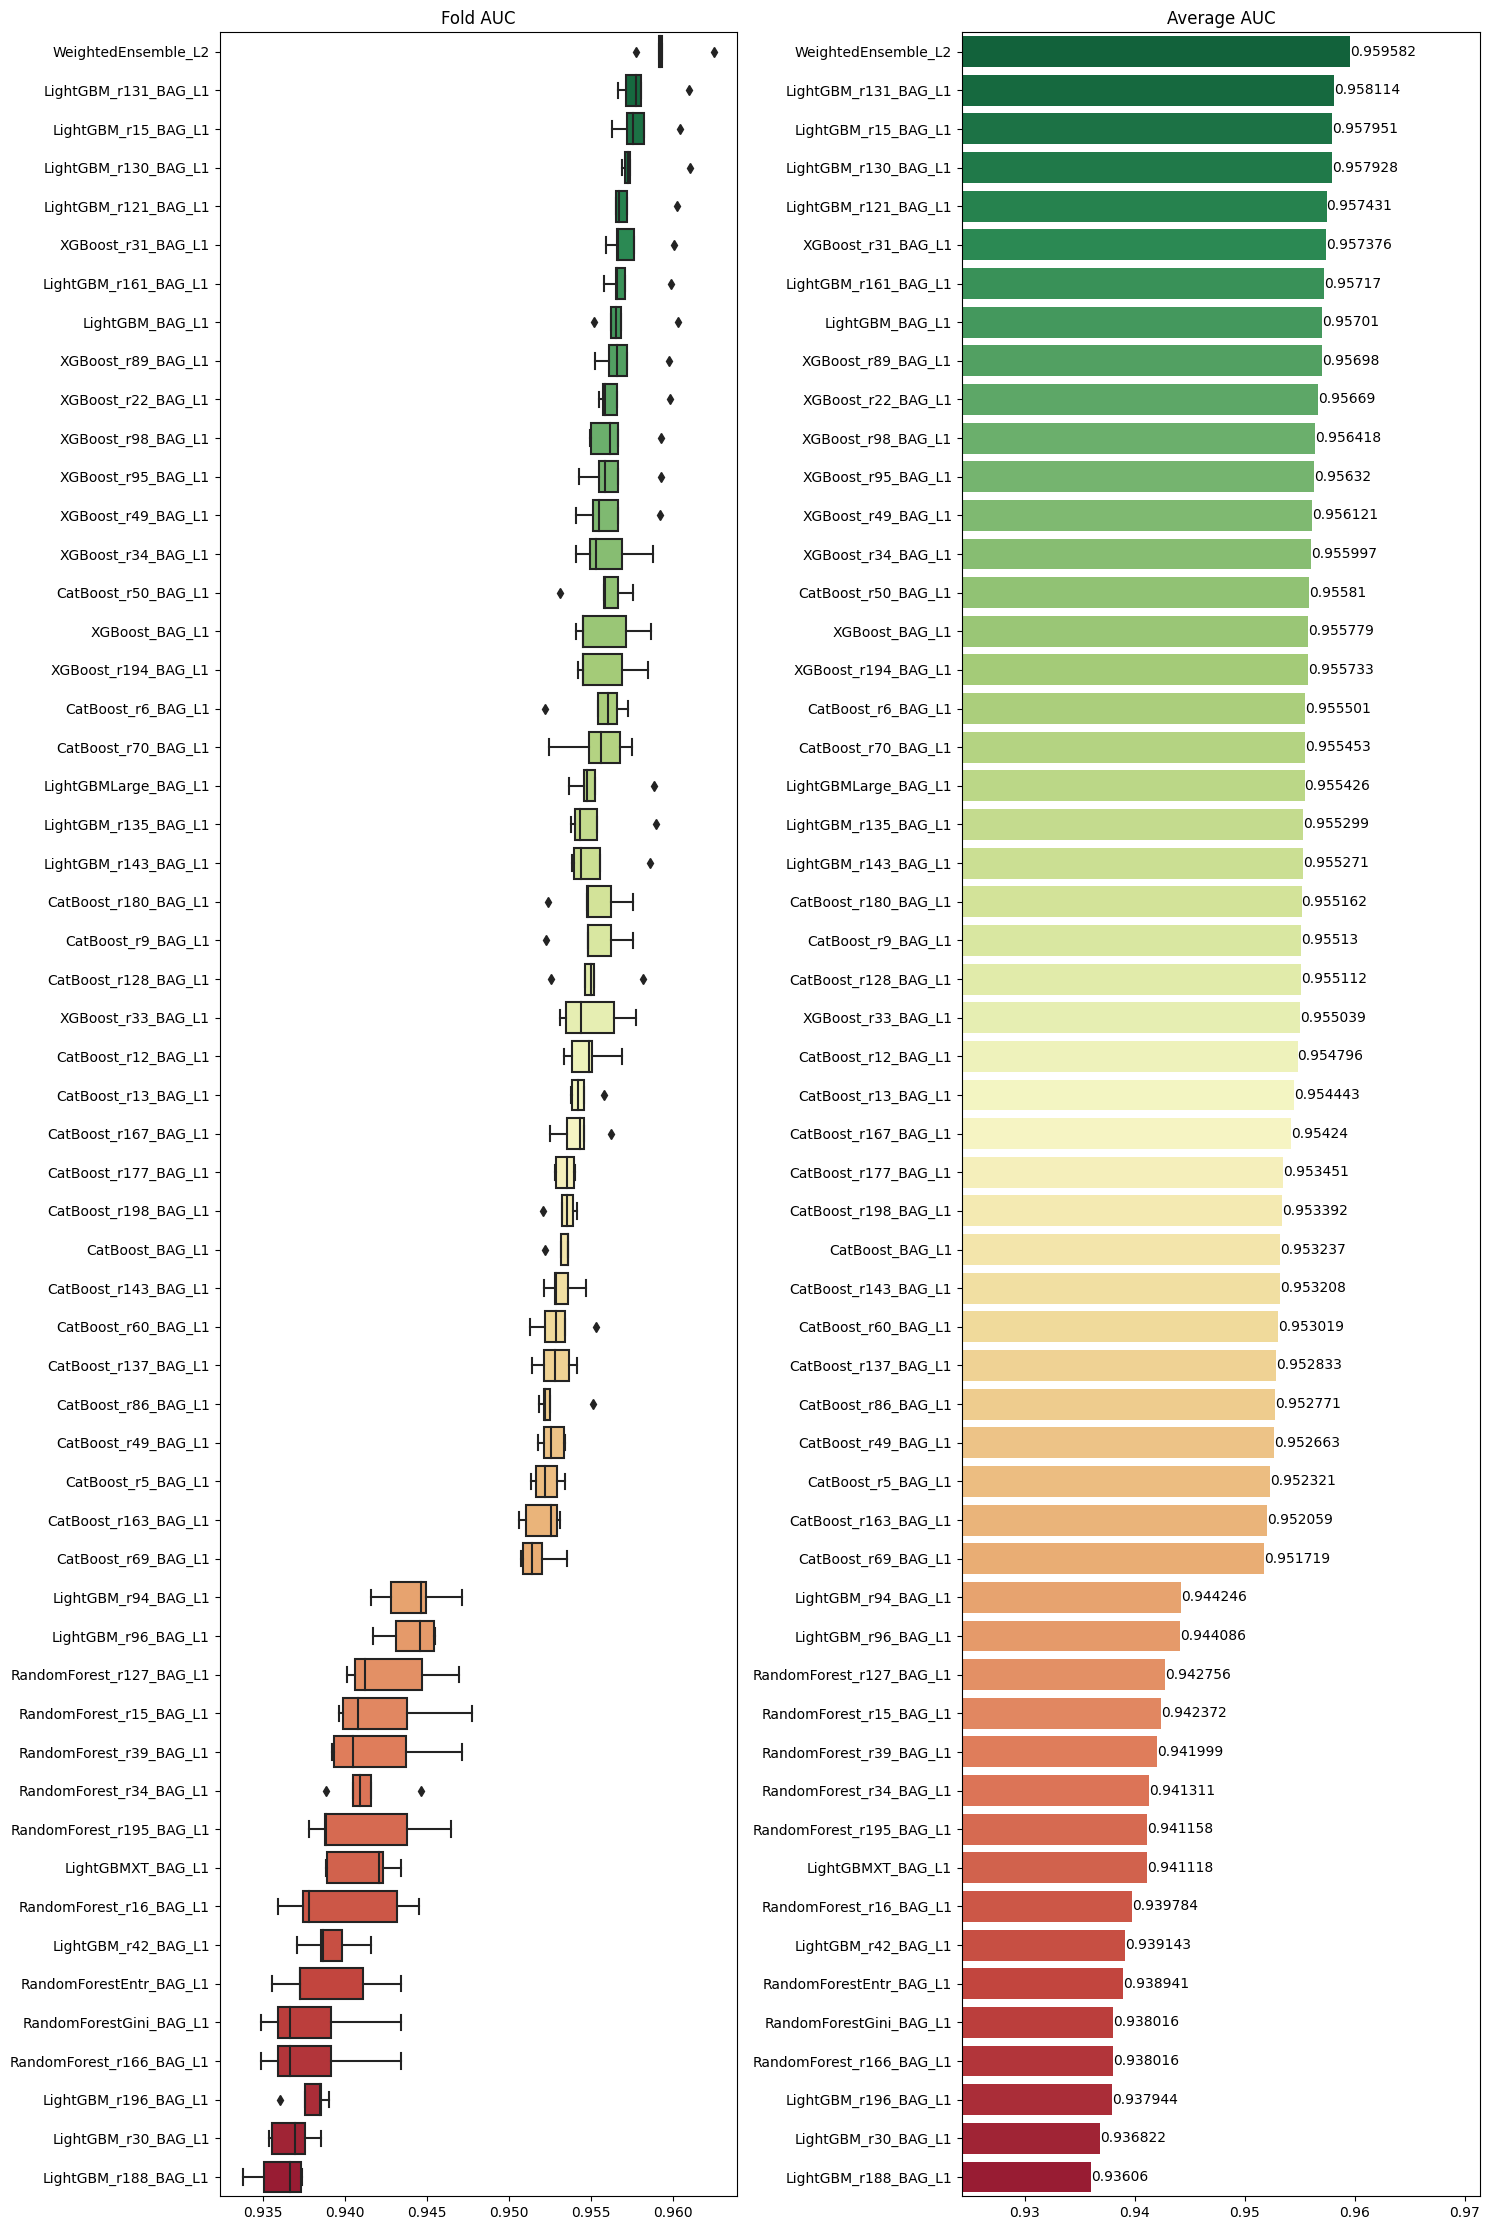

In [15]:
scores = pd.DataFrame(scores)
mean_scores = scores.mean().sort_values(ascending=False)
order = scores.mean().sort_values(ascending=False).index.tolist()

min_score = mean_scores.min()
max_score = mean_scores.max()
padding = (max_score - min_score) * 0.5
lower_limit = min_score - padding
upper_limit = max_score + padding

fig, axs = plt.subplots(1, 2, figsize=(15, scores.shape[1] * 0.4))

sns.boxplot(data=scores, order=order, ax=axs[0], orient='h', palette='RdYlGn_r')
axs[0].set_title('Fold AUC')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

barplot = sns.barplot(x=mean_scores.values, y=mean_scores.index, ax=axs[1], palette='RdYlGn_r')
axs[1].set_title('Average AUC')
axs[1].set_xlabel('')
axs[1].set_xlim(left=lower_limit, right=upper_limit)
axs[1].set_ylabel('')

for i, score in enumerate(mean_scores.values):
    barplot.text(score, i, round(score, 6), va='center')

plt.tight_layout()
plt.show()

In [16]:
shutil.rmtree("AutogluonModels")